In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/kaggle/input/netflix-movies-and-tv-shows-dataset/netflix_titles.csv.csv")

# Display first few rows
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [2]:
print("Shape:", df.shape)             
print(df.info())                      
print(df.isnull().sum())             
print(df.describe(include='all'))     

Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


### Insights:
### Find which columns have missing data (like director or country).
### Identify numerical vs categorical features.
### Check how many total titles are available.


🔹 Insight:
The dataset has 8807 rows and 13 columns.
Most missing values are in 'director', 'cast', and 'country' columns — common for movie datasets.
Dataset mainly contains categorical data like title, type, country, and genre.



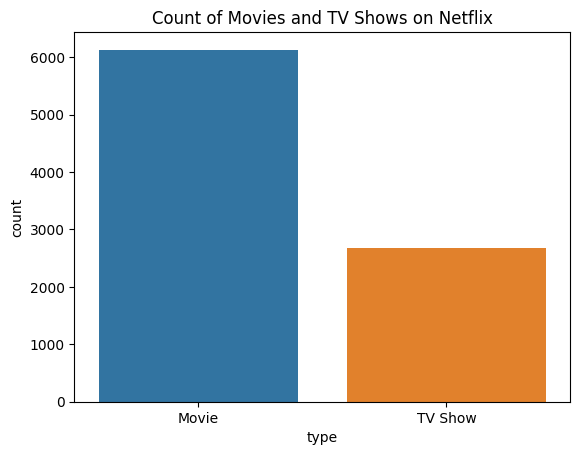


🔹 Insight:
Movies: 6131, TV Shows: 2676
Netflix has significantly more movies than TV shows.



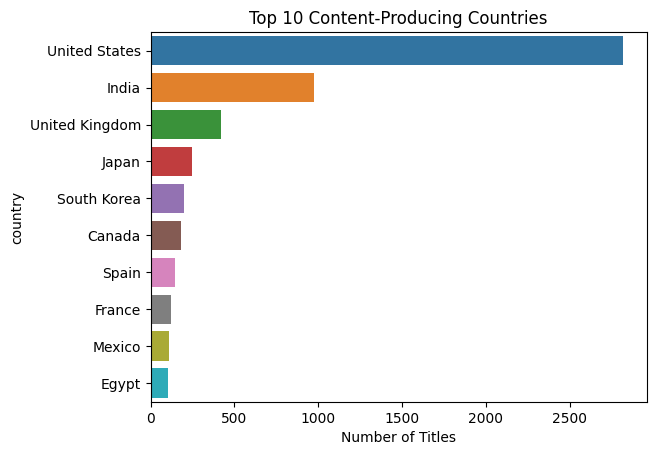


🔹 Insight:
The top content-producing country is United States, followed by India and United Kingdom.
This indicates Netflix’s catalog is dominated by English-speaking countries.



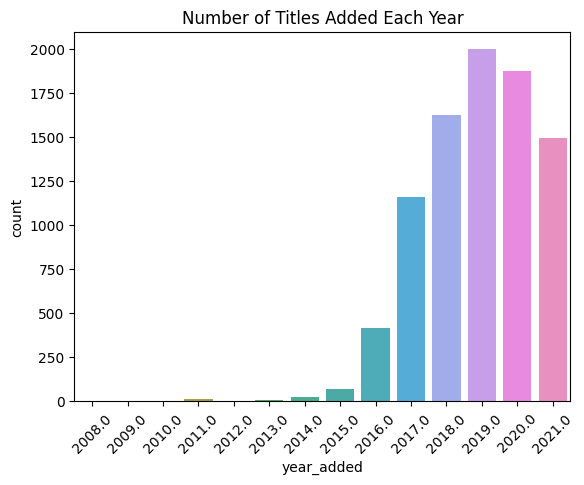


🔹 Insight:
Most titles were added in the recent years:
  - 2019 : 1999 titles
  - 2020 : 1878 titles
  - 2018 : 1625 titles
Netflix has been growing its library rapidly after 2015.



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


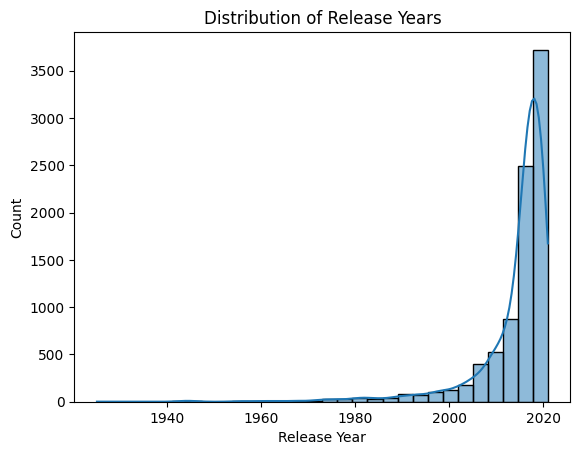


🔹 Insight:
The oldest title is from 1925 and the most recent from 2021.
Majority of titles were released between 2010 and 2020.



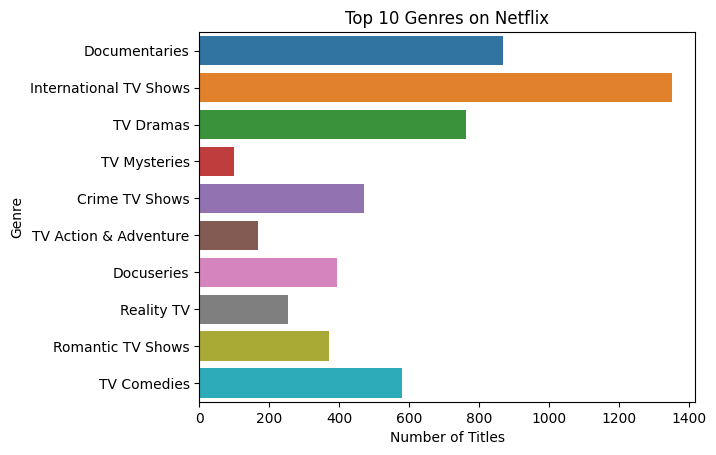


🔹 Insight:
The most common genre is 'Documentaries' followed by 'International TV Shows' and 'TV Dramas'.
This shows Netflix focuses heavily on popular entertainment genres.



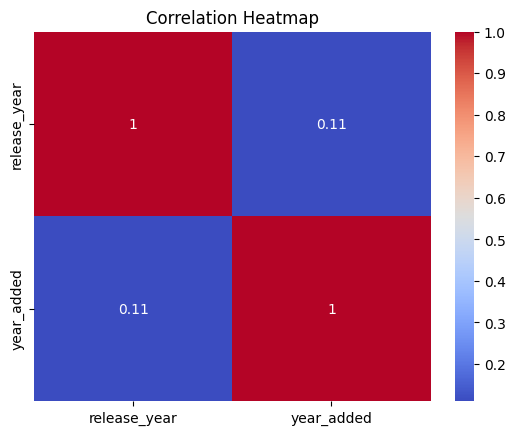


🔹 Insight:
Correlation heatmap shows weak correlations — as expected, numeric columns are minimal here.



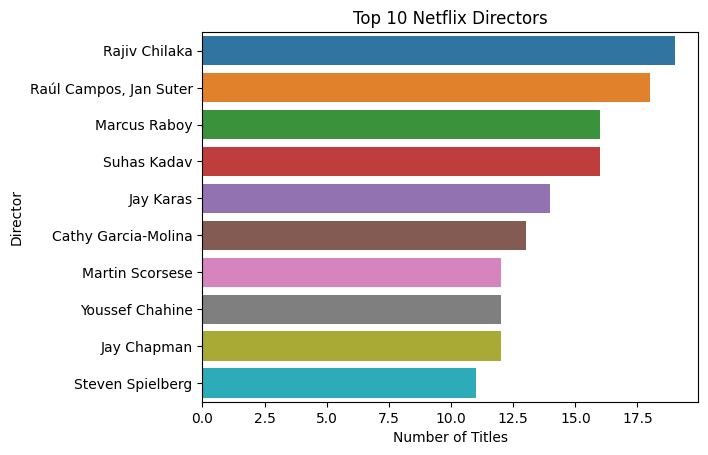


🔹 Insight:
The director with most titles is 'Rajiv Chilaka'. Netflix often collaborates with this director.
Shows consistent creative partnerships with certain filmmakers.



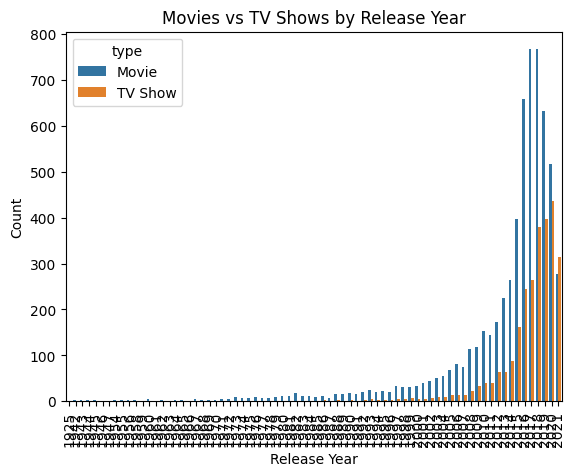


🔹 Insight:
Movies dominate across all years, but TV Shows have increased steadily since 2015, indicating a shift toward episodic content.



In [6]:
from collections import Counter
print("\n🔹 Insight:")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("Most missing values are in 'director', 'cast', and 'country' columns — common for movie datasets.")
print("Dataset mainly contains categorical data like title, type, country, and genre.\n")

sns.countplot(x='type', data=df)
plt.title("Count of Movies and TV Shows on Netflix")
plt.show()

print("\n🔹 Insight:")
type_counts = df['type'].value_counts()
print(f"Movies: {type_counts.get('Movie',0)}, TV Shows: {type_counts.get('TV Show',0)}")
print("Netflix has significantly more movies than TV shows.\n")

top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Number of Titles")
plt.show()

print("\n🔹 Insight:")
print(f"The top content-producing country is {top_countries.index[0]}, followed by {top_countries.index[1]} and {top_countries.index[2]}.")
print("This indicates Netflix’s catalog is dominated by English-speaking countries.\n")

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

sns.countplot(x='year_added', data=df, order=sorted(df['year_added'].dropna().unique()))
plt.title("Number of Titles Added Each Year")
plt.xticks(rotation=45)
plt.show()

print("\n🔹 Insight:")
recent_years = df['year_added'].dropna().value_counts().head(3)
print("Most titles were added in the recent years:")
for y, c in recent_years.items():
    print(f"  - {int(y)} : {c} titles")
print("Netflix has been growing its library rapidly after 2015.\n")

sns.histplot(df['release_year'], bins=30, kde=True)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

print("\n🔹 Insight:")
print(f"The oldest title is from {df['release_year'].min()} and the most recent from {df['release_year'].max()}.")
print("Majority of titles were released between 2010 and 2020.\n")

genre_list = df['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres = [genre.strip() for sublist in genre_list for genre in sublist]
top_genres = pd.Series(Counter(all_genres)).head(10)

sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

print("\n🔹 Insight:")
print(f"The most common genre is '{top_genres.index[0]}' followed by '{top_genres.index[1]}' and '{top_genres.index[2]}'.")
print("This shows Netflix focuses heavily on popular entertainment genres.\n")

numeric_df = df.select_dtypes(include=np.number)
if not numeric_df.empty:
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
    print("\n🔹 Insight:")
    print("Correlation heatmap shows weak correlations — as expected, numeric columns are minimal here.\n")
else:
    print("No numeric columns found for correlation heatmap.\n")

top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Netflix Directors")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

print("\n🔹 Insight:")
print(f"The director with most titles is '{top_directors.index[0]}'. Netflix often collaborates with this director.")
print("Shows consistent creative partnerships with certain filmmakers.\n")

sns.countplot(x='release_year', hue='type', data=df)
plt.title("Movies vs TV Shows by Release Year")
plt.xticks(rotation=90)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

print("\n🔹 Insight:")
print("Movies dominate across all years, but TV Shows have increased steadily since 2015, indicating a shift toward episodic content.\n")